In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load and prepare data
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
df = pd.read_csv(url, header=None)


In [3]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
    'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
    'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
    'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
    'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
    'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$',
    'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
    'capital_run_length_total', 'class'
]

# Assign names to the dataframe
df.columns = column_names

In [5]:
print("Shape:", df.shape)
print(df.head())
print(df['class'].value_counts())  # 1 = spam, 0 = not spam

Shape: (4601, 58)
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00 

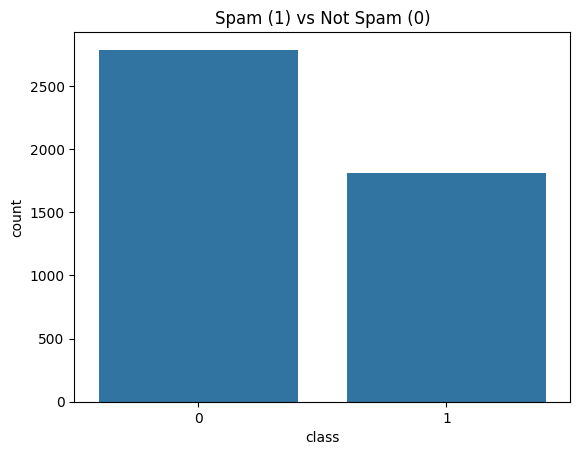

In [6]:
sns.countplot(x='class', data=df)
plt.title('Spam (1) vs Not Spam (0)')
plt.show()

In [7]:
print("Missing values:", df.isnull().sum().sum())

Missing values: 0


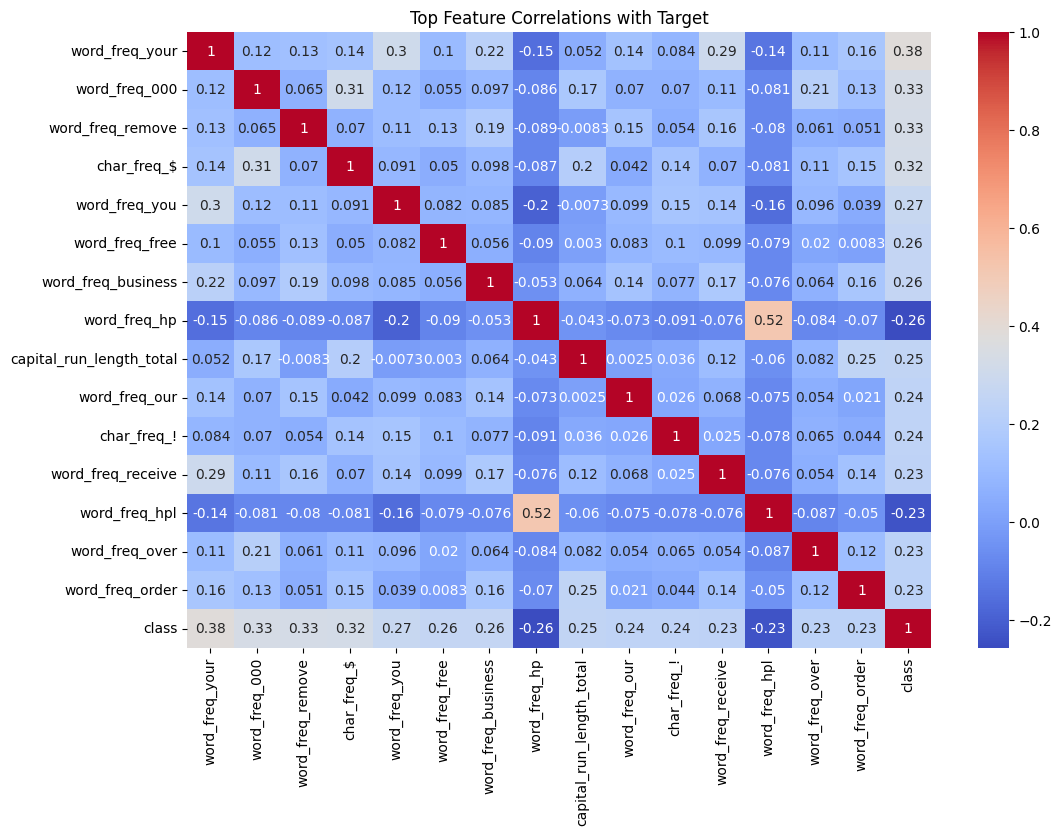

In [8]:
top_corr = df.corr()['class'].abs().sort_values(ascending=False)[1:16]
plt.figure(figsize=(12, 8))
sns.heatmap(df[top_corr.index.tolist() + ['class']].corr(), annot=True, cmap='coolwarm')
plt.title('Top Feature Correlations with Target')
plt.show()

In [9]:
X = df.drop('class', axis=1)
y = df['class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9565532223026793

 Confusion Matrix:
 [[786  18]
 [ 42 535]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       804
           1       0.97      0.93      0.95       577

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.96      1381
weighted avg       0.96      0.96      0.96      1381



In [15]:
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]

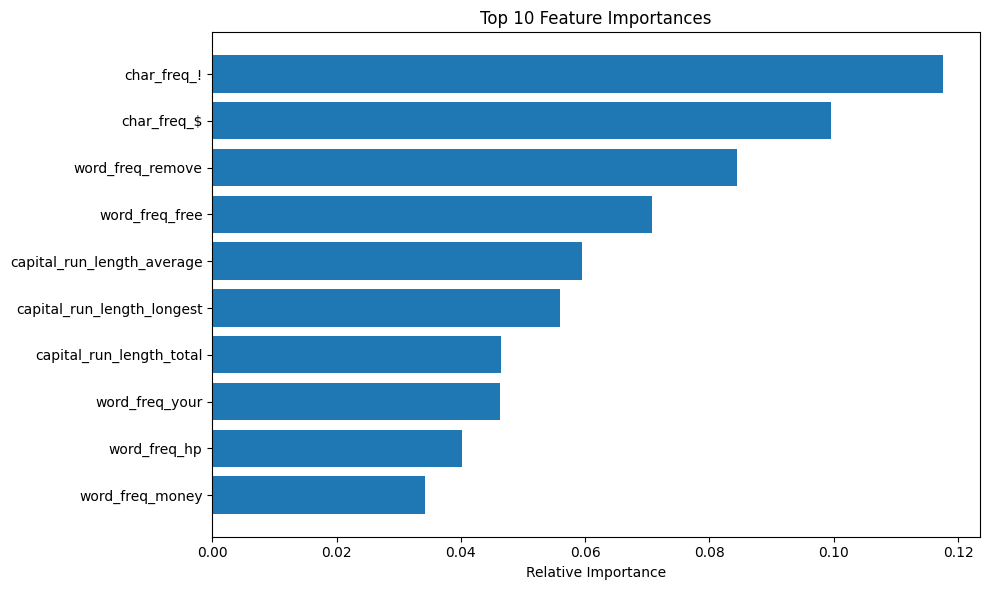

In [16]:
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [df.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [17]:
import os
import pickle
os.makedirs("model", exist_ok=True)
with open("model/spam_rf_model.pkl", "wb") as f:
     pickle.dump((model, scaler), f)

In [18]:
with open("spam_model.pkl", "wb") as f:
    pickle.dump((model, scaler), f)

In [19]:
# Download it
from google.colab import files
files.download("spam_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>